In [22]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sep

In [23]:
f105w = fits.open('/home/kahurd/astr-19/FINALPROJECT/105.fits')
f125w = fits.open('/home/kahurd/astr-19/FINALPROJECT/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
f160w = fits.open('/home/kahurd/astr-19/FINALPROJECT/160.fits')



data105 = f105w[0].data
data125 = f125w[0].data
data160 = f160w[0].data

In [24]:
#rescale the data
def rescale_image(data):
    pdata_tmp = data.copy()
    m =  np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax

In [25]:
def fits_quicklook(data, fnx=10, fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp,vpmin,vpmax = rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin, vmax=vpmax)

In [26]:
data105res, f105min, f105max = rescale_image(data105)
data125res, f125min, f125max = rescale_image(data125)
data160res, f160min, f160max = rescale_image(data160)

In [27]:
#limit the data to be between the min and max values in the rescaling
data105res[data105res<f105min] = f105min
data105res[data105res>f105max] = f105max
data125res[data125res<f125min] = f125min
data125res[data125res>f125max] = f125max
data160res[data160res<f160min] = f160min
data160res[data160res>f160max] = f160max

In [28]:
#rgb array image that is nx x ny y 3 in size, where each image is either R, G, B
rgb = np.zeros((data105res.shape[0],data105res.shape[1], 3))
rgb[:,:,0] = (data105res-f105min)/(f105max-f105min)
rgb[:,:,1] = (data125res-f125min)/(f125max-f125min)
rgb[:,:,2] = (data160res-f160min)/(f160max-f160min)

[W 2024-12-04 13:34:28,176.176 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


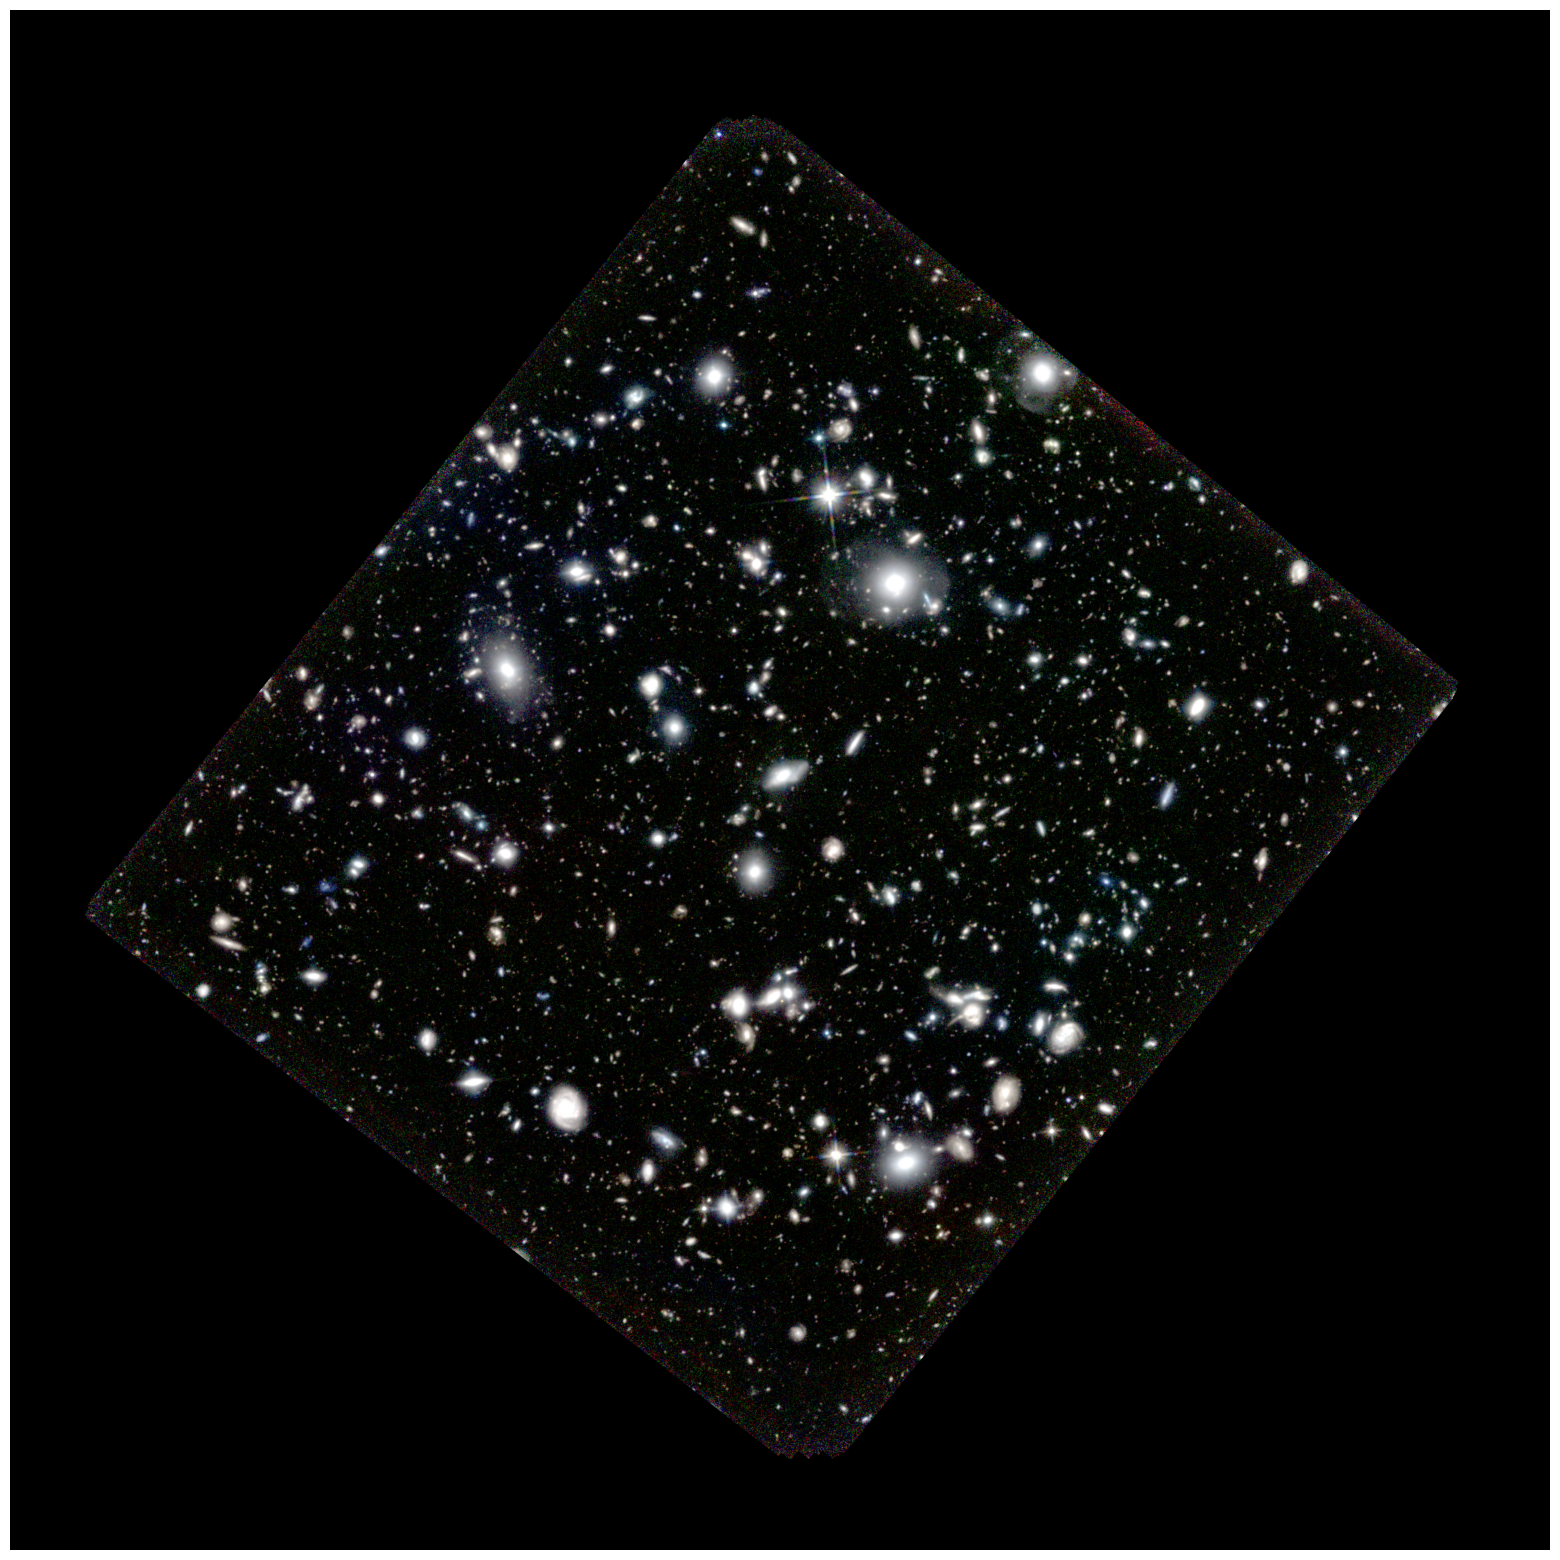

In [33]:
#plot the rgb image and save to a png
f,ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('RGB_image', bbox_inches='tight', pad_inches=0,dpi=600)